Functions
-----
1. particular syntax:

        def  functionName(argument1, argument2=0):
               Do something
               return(something)

2. called from the main body of the program

       functionName(arg1)
   
3. arguments can be default, or lists, or strings, etc
4. can call other functions

        def one_good_turn(n):
            return n + 1   

        def deserves_another(n):
        #return one_good_turn(n+2)
            return one_good_turn(n) + 2
        #main body of the program    
        print(deserves_another(10)) #calls the function deserves_another


5. CAN CALL ITSELF!
   

In [ ]:
def one_good_turn(n):
    return n + 1

def deserves_another(n):
#return one_good_turn(n+2)
    return one_good_turn(n) + 2

#main body of the program
print(deserves_another(10)) #calls the function deserves_another

13


# Module 2A -Recursion is magic!

* open 'google' search engine. Type in 'recursion' and press return. What is the result?

* To review: functions. They can call other functions. They can also call THEMSELVES.

* remember some aspects of functions:
  
     1. **When a function executes, the only information it has from its calling context are variables passed in from the calling function through its formal parameters.**

     2. **The calling function knows nothing about how the function operates- all it gets is the return value.**
     
* Appreciating the above two properties are going to be helpful when breaking down a recursive function.

![RecursionEscher.png](attachment:7a010775-0eca-4cb5-a175-49abe92126af.png)

Of course, xkcd also weighs in on the matter of recursion since it is such an important topic:
https://xkcd.com/1739/


Pep-talk? Notes? I'm not sure what to call this section:

-----------------------------

Despite being magical, recursion is a bit challenging. I strongly urge you to use a pencil and paper as you go through some of the simpler functions presented in this module to ensure that you REALLY understand when the rest of the program is pausing and handing off a variable to a function.

1. This notebook is FULL of examples. Most of these are for your own interest, and I have indicated that by placing at the end, and I will only cover a small handful of simplified examples. I have included them because I know some individuals want deeper experience with certain key concepts, but don't worry if that is not you at this point! Some programmers swear by recursion whereas many others never touch it beyond their introductory course. Recursion is a useful pedagogical activity to ensure that you REALLY understand functions and how memory is being used before we move on to object oriented programming, which bundles and encapsulates functions.

2. One of the things that I will show you to help with understanding of what it is going on with recursion is the spacer example. This allows you to visualize **where** in the function you are at without having to include a bunch of cluttering print statements (although, if that helps you, you should always consider using print statements!). It will help your understanding if you play around with the 'spacer' variable introduced towards the end of this notebook so you can see which recursion loop you are in -indicated by the level of indentation- at any given moment of the program.  

3. I am going to start by showing you an example of a Sierpinksi triangle that I found at Github (link given in cell). This is a VERY sophisticated example that we won't reproduce, it is just pretty so we can admire it, and provides us with the opportunity to install our first packages, matplotlib and numpy. How do we do that? It will depend on what you are using. **Colab?** Already has matplotlib and numpy (they are part of a standard DS stack).

If you are using miniforge on your own laptop (these commands might be out of date, so double check before proceeding):  
    * open your terminal (the same terminal where you type in jupyter notebook to start your notebook)
    * type: conda install matplotlib
    * type: conda install numpy

It will likely ask you to type "y" to agree to update other packages with dependencies to matplotlib. Dependencies just means that other already installed packages have particular functions and features that are tied to the functionality of this package and thus may need to be updated. Please do that.

You can check to see what packages you have installed by typing: pip list in the terminal.

One of the "extra" practice (only for those who are particularly interested in recursion!) is the following:
-------

I have done something a bit simple in this notebook- but effective for illustration - to the generate_kmers_rec function. We saw how to build trinucleotides in Intro to Python 1 (we used one example and refined it throughout the module); generat_kmers_rec simply extends that to creating polynucleotides of any length specified by the user. For the trinucleotide loop, I used the same order in the outer, middle and inner for loops, ["A","C","G","T"]. In the kmer function, in order to try to make it easier to see where in the loop you are, I have listed the bases in a different order, as described below:

The base case when length ==1, has the bases listed in the order ["A","C","G","T"]. I have reversed the order of the bases listed as part of the for loop in the recursion loop, ie. for base in ["T","G","C","A"]:. This allows you to see how the kmers are being created (and thus, how the program is pausing the filling up of the results list on the final loop as it creates and fills up the results lists on the earlier loops). It wasn't clear which results list was being created first when the first item appeared as "AA" but now the first item will be "AT" so it is easier to infer how the loops are being used.


In [ ]:
# This is a sierpinski triangle to show you how cool recursion - and fractals! - can be:
# simple rules, make a recursive triangle that looks like a christmas tree.
# Code stolen from here:
# https://github.com/IlievskiV/Amusive-Blogging-N-Coding/blob/master/Visualizations/sierpinski_triangle.ipynb

# importing modules! We saw how to do this in Intro to Python I. Creating a basic module was part of your last 'assignment'.
# this shows the two ways of importing methods from a module and also shows aliases!
import random
from operator import add
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np

# we are, as the import statements above show us, importing rc as a method from matplotlib
rc('animation', html='jshtml')

# ignore warnings <--- Usually this isn't the best idea, but...
import warnings
warnings.filterwarnings("ignore")

def generate_sierpinski_triangle(n: int):
  """Function to generate the points on the Sierpinski triangle.
  Args:
    n (int): number of points to generate

  Returns:
    list: list of tuples representing the points belonging
      to the Sierpinski triangle.
  """
# generating the sierpinski triangle:
def generate_sierpinski_triangle(n: int):
    sierpinski_triangle = []  # final list of points

    # initial points
    A = (0.0, 0.0)
    B = (0.5, 1.0)
    C = (1.0, 0.0)
    triangle_vertices = [A, B, C]

    # starting point
    moving_point = random.choice(triangle_vertices)

    for i in range(n):
        offset_point = random.choice(triangle_vertices)
        moving_point = list(map(lambda x: x / 2.0, list(map(add, moving_point, offset_point))))
        sierpinski_triangle.append(moving_point.copy())

    return sierpinski_triangle

def plot(sierpinski_triangle: list):
  """Make a plot of the points in the Sierpinski triangle.
  Args:
    sierpinski_triangle (list): list of tuples representing the points belonging
      to the Sierpinski triangle.
  """
  num_points = len(sierpinski_triangle)
  points_split = list(zip(*sierpinski_triangle))
  xx, yy = points_split[0], points_split[1]

  fig = plt.figure(figsize=(5, 5))
  ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
  ax.set_xticks([], [])
  ax.set_yticks([], [])
  ax.set_axis_off()
  ax.scatter(xx, yy, c=np.random.rand(len(xx),3), marker='.')
  ax.text(0.01, -0.06, 'by Vladimir Ilievski', fontsize=18)
  plt.savefig(f'sierpinski_triangle_{num_points}.png', dpi=300, bbox_inches='tight')

def make_animation(sierpinski_triangle: list):
  """Make an animation of the Sierpinski triangle by zooming in.
  Args:
    sierpinski_triangle (list): list of tuples representing the points belonging
      to the Sierpinski triangle.
  """
  num_points = len(sierpinski_triangle)
  points_split = list(zip(*sierpinski_triangle))
  xx, yy = points_split[0], points_split[1]
  fig = plt.figure(figsize=(10, 10))

  def init():
    ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    return ax.plot(xx, yy, "g.")

  def animate(i):
    scale = 1 - i * 0.02  # calculate the new scale
    ax = plt.axes(xlim=(0, scale), ylim=(0, scale))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_axis_off()
    return ax.plot(xx, yy, "g.")

  anim = animation.FuncAnimation(fig, animate, init_func=init, frames=50,
                                 interval=200, blit=False)
  anim.save(f"sierpinski_{num_points}.gif", writer="pillow")
  plt.show()

In [ ]:
sierpinski_triangle_1 = generate_sierpinski_triangle(20000)
sierpinski_triangle_2 = generate_sierpinski_triangle(200)

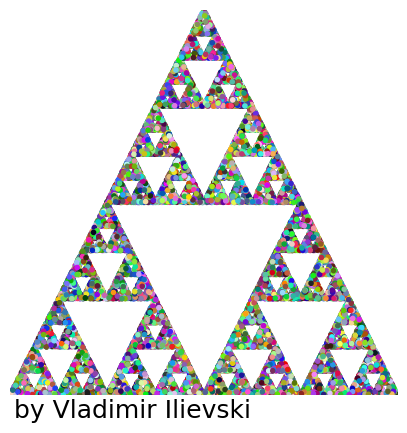

In [ ]:
plot(sierpinski_triangle_1)

After that distraction (and sophisticated example), we are back:
--------
Note to remember (this is particularly important for recursion):

the %%time method is a magic command that will calculate the entire execution of the entire cell. It should work regardless of your operating system.

I was struggling to get this to work and finally discovered the answer:

YOU MUST HAVE NO BLANK LINES (even comments) ABOVE THE %%time command for it to work. For instance, this:

----------------------------

#here is the time command

%%time

rest of code written out

----------------------------

won't work!

but this:

--------------------------

%%time

rest of code

--------------------------
will work just fine.

#### Let's begin with a reminder that functions can call other functions:

In [ ]:
%%time
# functions can call other functions
def cube(number):
    return number**3

def by_three(number):
    if number%3 ==0:
        return cube(number)
    else:
        return False

print(by_three(27))

19683
CPU times: user 555 µs, sys: 952 µs, total: 1.51 ms
Wall time: 1.04 ms


* We see recursion in other fields like, say, math.
* There are TWO main parts of a recursive function: base case and general recursion case.

Example: Factorial
> **Base rule:** checks to see if we have reached the ultimate state (ie. have we reached the stopping condition and, if so, what should we do?)
>>0!

> **General rule:** or **Recursive rule** is when the functions calls itself
>>n!=n*(n-1)!


* It is CRUCIAL to have at least one **'base case rule'** which dictates what happens when you get a certain point and a 'general rule' or 'recursive rule', ie. what happens the rest of the time.

Much like in a while loop, if you fail to specify a base case, you can get stuck in an infinite loop (or an infinite recursion).

#### Recursion is often the best way to solve a problem that is made up of smaller versions of the same problem repeatedly.

* pros:
    * efficient way to think about solution
        * for some highly specific problems, may be the only way to solve
    * it is the kind of method that shows up A LOT on coding interviews
    * allows you to expand your thinking about programming

* cons:
    * really, really memory intensive
    * complex

Let's start where everyone learning recursion begins, with factorial.

In [ ]:
%%time
# The non-recusive method of determining the factorial using a while loop
def factorial(x):
    fac=1
    while x!=0:
        # if x=4, 4*3*2*1
        fac=fac*x
        x=x-1
    return fac

print(factorial(4))

24
CPU times: user 519 µs, sys: 208 µs, total: 727 µs
Wall time: 711 µs


In [ ]:
%%time
# The recursive method of determining the factorial!
def factorialrec(x):
    #note: This is incredibly important: there must always be a BASE
    # case with recursion.
    if x==0:
        return 1
    else:
        #print(x)
        return x*factorialrec(x-1)

print(factorialrec(4))

24
CPU times: user 244 µs, sys: 164 µs, total: 408 µs
Wall time: 414 µs


![Screenshot 2024-03-28 at 9.43.08 AM.png](attachment:17d91b02-e689-457d-929d-c596a096b804.png)
![Screenshot 2024-03-28 at 9.44.15 AM.png](attachment:f2d16fbd-ca65-43ad-b2e3-966125ff2331.png)

In [ ]:
# Another trivial example of recursion. We could modify this to do something more interesting.
# Let's say, for instance, we wanted to print off all values from 1-->number.
def sub_one(number):
# WE ALWAYS NEED A  BASE CASE OR THE RECURSION WILL NEVER STOP.
# You could hash out the base case and see for yourself the exception that is raised.
    if number==1:
        return 1
    print(number)
    # the function CALLS ITSELF. Is your mind blown yet?
    return sub_one(number-1)

# call the function from the main body of the program
print(sub_one(4))

4
3
2
1


Another example of recursion:

In [ ]:
#%%time
# --------------------------------
# In this cell, I am trying to show you that value of 3 is being
# evaluated and then pauses to evaluate value 2 which then pauses
# to evaluate value 1. which then completes and prints out the ~~~~~
# and the other print statements before
# returning to value 2 which then prints out the ~~~~~ and the
# other print statements before returning to value 3
# that's what the print statements are supposed to show you, at least
# --------------------------------

def printFunc(test):
    print("I am on round:", test)
    if (test < 1):
        #return nothing ie. None is the word supplied to you by Python
        return
    else:
        # This will print out the variable, an integer, followed by a newline
        # This chunk of code prints out the variables 3, 2 and 1 and then prints
        # them out in reverse 1,2,3 as the recursion line, line 28,  resolves and releases
        # the embedded recursions from memory.
        # 1st time through this should print 3
        print(test,"\n")
        # Next: Recursion Magic. the function pauses and calls itself.
        # We call the function from within the function with 1 less integer value
        #first time through, we are passing the value of 2
        #----------------------------------------------------------
        printFunc(test-1)
        # When the following ~~~~~~ prints out, we know that we have left the recursion
        #loop because the BASE CASE -- the if statement -- has returned to the printFunc(0)
        # and the other variables - that are still in paused loops- need to be
        # resolved now so the program now continues.
        print("~~~~~~")
        print(test)
        print("----------")
        #----------------------------------------------------------
        #returning nothing because you are printing to the screen.
        #return

test = 3
printFunc(test)
#BECAUSE we have nothing specified to return, Python helpfully provides us with None
#when print out the results of the printFunc()
#print(printFunc(test))

I am on round: 3
3 

I am on round: 2
2 

I am on round: 1
1 

I am on round: 0
~~~~~~
1
----------
~~~~~~
2
----------
~~~~~~
3
----------


I'm adding a spacer parameter to the function that will add one tab for every recursion cycle you are in. Let's discuss!

In [ ]:
#%%time
# --------------------------------
# In this cell, I am trying to show you that value of 3 is being
# evaluated and then pauses to evaluate value 2 which then pauses
# to evaluate value 1. which then completes and prints out the ~~~~~
# and the other print statements before
# returning to value 2 which then prints out the ~~~~~ and the
# other print statements before returning to value 3
# that's what the print statements are supposed to show you, at least
# --------------------------------

def printFunc(test,depth=1):
    #for the spacer, I am using a tab, but you could also use "   " <-- white space
    spacer="\t"*depth
    print("I am on round:", test)
    if (test < 1):
        #return nothing ie. None is the word supplied to you by Python
        print(spacer,"We are back at 1")
        return
    else:
        # This will print out the variable, an integer, followed by a newline
        # This chunk of code prints out the variables 3, 2 and 1 and then prints
        # them out in reverse 1,2,3 as the recursion line resolves and releases
        # the embedded recursions from memory.
        #1st time through this should print 3 WITH A SPACER IN FRONT OF IT TO ORIENT YOU.
        print(spacer,test,"\n")
        # Next: Recursion Magic. the function pauses and calls itself.
        # We call the function from within the function with 1 less integer value
        #first time through, we are passing the value of 2
        #----------------------------------------------------------
        depth=depth+1
        printFunc(test-1,depth)
        # When the following ~~~~~~ prints out, we know that we have left the recursion
        #loop because the BASE CASE -- the if statement -- has returned to the printFunc(0)
        # and the other variables - that are still in paused loops- need to be
        # resolved now so the program now continues.
        print("~~~~~~")
        print(test)
        print("----------")
        #----------------------------------------------------------
        #returning nothing because you are printing to the screen.
        return

test = 3
printFunc(test,1)
#BECAUSE we have nothing specified to return, Python helpfully provides us with None
#when print out the results of the printFunc()
#print(printFunc(test))

I am on round: 3
	 3 

I am on round: 2
		 2 

I am on round: 1
			 1 

I am on round: 0
				 We are back at 1
~~~~~~
1
----------
~~~~~~
2
----------
~~~~~~
3
----------


Write a Python program to calculate the sum of a list of numbers using recursion.

In [ ]:
# Define a function named list_sum that takes a list of numbers as input
def list_sum(num_List):
    # Check if the length of the input list is 1
    if len(num_List) == 1:
        # If the list has only one element, return that element
        return num_List[0]
    else:
        # If the list has more than one element, return the sum of the first element
        # and the result of recursively calling the list_sum function on the rest of the list
        return num_List[0] + list_sum(num_List[1:])

# Print the result of calling the list_sum function with the input [2, 4, 5, 6, 7]
print(list_sum([2, 4, 5, 6, 7]))

24


# Another example: Define a function named power that calculates the result of 'a' raised to the power of 'b'

In [ ]:
# Define a function named power that calculates the result of 'a' raised to the power of 'b'
def power(a, b):
    # Check if 'b' is 0 (base case for power function)
    if b == 0:
        # If 'b' is 0, return 1 (any number raised to the power of 0 is 1)
        return 1
    # Check if 'a' is 0 (base case for power function)
    elif a == 0:
        # If 'a' is 0, return 0 (0 raised to any power is 0)
        return 0
    # Check if 'b' is 1 (base case for power function)
    elif b == 1:
        # If 'b' is 1, return 'a' (any number raised to the power of 1 is the number itself)
        return a
    else:
        # If none of the base cases is met, recursively call the power function
        # to calculate 'a' multiplied by the result of 'a' raised to the power of 'b-1'
        return a * power(a, b - 1)

# Print the result of calling the power function with the input values 3 and 4
print(power(3, 4))

81


## When to consider using recursion:
     * solves a larger problem in terms of a smaller one
     * argument must change each time (to avoid an infinite loop)
     * the changing argument value must be approaching the **BASE CASE**
     * should return the result of the sub function call plus something else
     
### Basic premise of recursion:
    * leverages scoping rules - I can change the argument in middle of the function before passing it back to the function itself because of scoping
    * BASE CASE, BASE CASE, BASE CASE!

### Okay, sounds complicated. Shouldn't we just stick to nested for loops since they take us pretty far...
* Most professional programmers will tell you that outside some very specific (usually mathematical) implementations, it is usually better to use a loop
### Recursion is perfect for one particular use in biology that is challenging to solve otherwise....

                                        TREE LIKE DATA
* Two major types encountered in biology:
    1. Child-to-parent (bottom up) -- easiest to use dictionary
    2. Parent-to-child (top down)     
* Recursion is better than iteration when you have complicated NESTED DATA – which is we often do in biology (phylogenies).
    * used in common algorithms such as bubble-sort, binary searches, Artifical intelligence (nested searches, at least), trees (especially important in "top down" searches)
* If you don’t have much memory (stack overflow) than usually iteration is better since recursion takes up a lot of working memory since the function is active for much longer than in iteration.

# We will build this together!
* Define a function named fibonacci that calculates the nth Fibonacci number. A fibonacci sequence: https://en.wikipedia.org/wiki/Fibonacci_sequence
* 1,1,2,3,5,8,13,21

In [ ]:
def fibonacci(n):


3


# ONLY IF there is time, we will work through the following question:
MRCA means “Most Recent Common Ancestor” and provides important information about the time to species splitting. In the example we worked through in lecture 11, the MRCA of Pan troglodytes  and  Tarsius tarsier is Haplorrhini.
We will use an abstracted and simplified tree (shown below) and the corresponding dictionary describing its relationships. The tree given below can be summarized in Newick format with the following: ((((C11,C12),B1),((C21,C22),B2)),A

tax_dict={"C11":"B1","C12":"B1","C21":"B2","C22":"B2","B1":"A","B2":"A"}
 	Write a program that includes a recursion function that takes two arguments, the dictionary describing child -> parent relationships given above and a list of taxa, and returns the MRCA of the inputted taxa.


	Of course, there is more than one way of solving this problem (so feel free to disregard the following suggestions if you have thought up a better way to solve it) but here are a few hints for the way that I solved it. For my solution, I adopted the following strategy of breaking down the problem into multiple functions:
•	One function that processes the list of taxon that you want to compare so that you are comparing two elements of the list at a time (I found the .pop method useful)
•	A second function that finds the common ancestor of these two elements produced by the first function
•	A third function (in my solution this was the one that used recursion) to find all the ancestors of each of the two taxons. In my solution, this was the same as the code that we went through during lecture.
•	The above processes need to continue for as long as you have elements in your input list.

You will need to write one program that should solve for the most general case (in case your taxon had more members or more internal nodes than currently listed). For instance, if I swapped your library that detailed the relationship pictured above for another library that added a row of “d” elements (d111, d112, d121, d122, d211, d212, d221, d222), your code should still work.
)


![Screenshot 2024-04-04 at 1.20.30 PM.png](attachment:8fd1d48c-1680-4835-bcdd-6176ad8720f6.png)

## Below this line is all extra material. It is entirely optional!

In Python I, we generated trinucleotides ('trimers') and their counts. We could have used functions to generate the trinucleotides, as shown in the next cell.

_The issue with the code below is that it isn't particularly flexible. What would happen if, for instance, we wanted to generate kmers instead of trimers?_


In [ ]:
%%time
def generate_trimers():
    bases=["A","C","G","T"]
    result=[]
    #we know that, in this case, that we are creating a trimer
    for base1 in bases:
        #for A then C followed by G and, finally, T
        for base2 in bases:
            #for A then C and then G and then T
            for base3 in bases:
                #for A then C and then G and then T
                result.append(base1+base2+base3)
    #first time through the loop should create result AAA,AAC,AAG,AAT
    #then you are adding ACA,ACC,ACG,ACT and AGA,AGC,AGG,AGT and ATA,ATC,ATG,ATT
    return result

print(generate_trimers())

['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']
CPU times: user 160 µs, sys: 86 µs, total: 246 µs
Wall time: 179 µs


In [ ]:
%%time
def generate_kmers(length):
# ---------------------------------------------
# in this script, we don't know how long the kmer should be or, rather, we want
# length to be robust and specified as an argument
# set the solution to this problem up as a series of for loops, like in the cell
# above but since we don't know the final length of -mer, we can't use a set
# number of for loops.
# How are we going to tackle this problem?
# ---------------------------------------------
    result=["A","C","G","T"]
    #create a list of unimers - the user can't specify length 0 which could make
    # the code less robust so we could insist on parameters.
    for i in range(0,length-1):
    # for loop to decrement by 1 each time through
        new_result=[]
        #new result that is currently empty - it will hold extended -mres
        #for kmer in ["1","2","3","4"]: # <-- even easier to see
        for kmer in ["T","C","G","A"]:
        # Purpose of this loop is to add one more nt to the end of a -mer each time through
        # You begin with four unimers and after the first time through the loop,
        # you end with 4**2 dimers and the third time through, you end up with a list of
        # length 4**3 trimers etc
            for base in result:
                new_result.append(kmer+base)
                #first time through kmer = A so the new_result will be a list of dimers
                #new_result=[AA,AC,AG,AT] then kmer will be C, G and finally T
                #this will result in 16 dimers
        result=new_result
        #replace unimer result list with dimer list and go to line 8 until length-1...
        # so for 4, that is three
    return result

print(generate_kmers(3))
# this is really long:
#print(generate_kmers(5))

['TTA', 'TTC', 'TTG', 'TTT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TAA', 'TAC', 'TAG', 'TAT', 'CTA', 'CTC', 'CTG', 'CTT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CAA', 'CAC', 'CAG', 'CAT', 'GTA', 'GTC', 'GTG', 'GTT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GAA', 'GAC', 'GAG', 'GAT', 'ATA', 'ATC', 'ATG', 'ATT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'AAA', 'AAC', 'AAG', 'AAT']
CPU times: user 562 µs, sys: 287 µs, total: 849 µs
Wall time: 700 µs


Okay. Great. We have built in some flexibility into the code. Now we begin to concern ourselves with efficiency. The code above is a bit cumbersome.

What is happening in the code below?

#### I cannot stress this enough -  use a pencil and paper and draw out what is happening with the code below.
    * If you understand where you are at any given time in the 'layers' of memory with the result list, you can confidently say that you understand recursion!

In [ ]:
#%%time
#instead of nested for loops, we can do the same thing more efficiently with recursion....
# -----------------------------------------------------
# warning: recursion is a way of thinking that is counter-intuitive initially and, much
# like while loops, should be undertaken with great care so you don't get stuck.
# -----------------------------------------------------
# the strategy of the following code can be summarized as the following:
# * to get a list of all possible kmers of a given length, start by checking the length.
#      1. if length is one - base case -  you are all done.
#      2. if length if > one, take the list of all possible sequences whose length is one
        # less than the length you're looking for and add each of the four possible bases
        # to each of it's elements to get the result
# -----------------------------------------------------

def generate_kmers_rec(length):
# -----------------------------------------------------
#IMPORTANT WITH RECURSION: ALWAYS establish a base case: if
# the length is 1, then simply return a list of unimers
# (similar to while loops). This will be the 'outer loop' of the recursion
# visited. So you can see in the example below that the letters A C G and T will
# be added to the numbers that are added in the else loop.
# -----------------------------------------------------
    if length==1:
        return ["A","C","G","T"]
    #if length is >1 then
    else:
    #intialize an empty list.
    # key to understanding: this result list will be present in the memory layer for
    # length=1, there will be a different result list - even though it has the same variable
    # name - for the memory layer that has length=2 and finally a different one will be
    # present for the memory layer for length =3.
        result=[]
# -----------------------------------------------------
# ONTO THE MAGIC PART OF THIS SOLUTION!
# -----------------------------------------------------
        for seq in generate_kmers_rec(length-1):
    # for length =2, we call the function itself and it is >1, so we initialize empty
    # result list for length 2 BECAUSE OF SCOPING RULES <-- you knew that was gonna come in
    # handy. We call the function again but this time, length 1 so it returns and
    # function call is over.
            print("what is length-1? This will remind you where you are in the recursion stack: " +str(length-1))
    #NOTE: IN ORDER TO UNDERSTAND WHAT IS HAPPENING HERE, I have changed
    # THIS TO BE for base in ["1","2","3","4"] just so you can keep
    # track of where you are in the recursion 'stack'. To produce a
    # kmer, you should change it back to ["T","G","C","A"].
            for base in ["1","2","3","4"]:
    #now it returns to the point in the code where it stopped to call the other function
    #so you have result list for 2 which is [A,C,G,T] which you are then appending to
                result.append(seq+base)
                print(result)
        #like the for loop example before, this gives: AA,AC,AG,AT,CA,CC,CG,CT etc.
        return result

print(generate_kmers_rec(3))

what is length-1? This will tell you where you are in the recursion stack: 1
['A1']
['A1', 'A2']
['A1', 'A2', 'A3']
['A1', 'A2', 'A3', 'A4']
what is length-1? This will tell you where you are in the recursion stack: 1
['A1', 'A2', 'A3', 'A4', 'C1']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4']
what is length-1? This will tell you where you are in the recursion stack: 1
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3', 'G4']
what is length-1? This will tell you where you are in the recursion stack: 1
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3', 'G4', 'T1']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'G1', 'G2', 'G3', 'G4', 'T1', 'T2']
['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4',

Here's a more biologically relevant example. You will often see recursion used for tree problems, ie. genealogies, phylogenies, networks that eventually end in one node. Keeping with our great ape examples, but complicated, this is a tree that uses a dictionary and recursion.

In [ ]:
def get_ancestors(taxon):
    if taxon=="Primates":
        print ("Taxon is Primates - you are the top of this phylogeny already!")
        return [] # you are already at the top of the tree
    else:
        print("Taxon is not Primates so it must have at least one ancestor")
        parent=tax_dict.get(taxon)
        print("The parent is "+parent+" ")
        print("Looking up ancestors for "+parent)
        parent_ancestors=get_ancestors(parent)
        print("parents ancestors are "+str(parent_ancestors))
        #adding to a result list that you will return
        result=[parent]+parent_ancestors
        print("about to return the result: "+str(result))
        return result


tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
#print(get_ancestors("Pan troglodytes"))
print(get_ancestors("Galago alleni"))

Taxon is not Primates so it must have at least one ancestor
The parent is Lorisiformes 
Looking up ancestors for Lorisiformes
Taxon is not Primates so it must have at least one ancestor
The parent is Strepsirrhini 
Looking up ancestors for Strepsirrhini
Taxon is not Primates so it must have at least one ancestor
The parent is Primates 
Looking up ancestors for Primates
Taxon is Primates - you are the top of this phylogeny already!
parents ancestors are []
about to return the result: ['Primates']
parents ancestors are ['Primates']
about to return the result: ['Strepsirrhini', 'Primates']
parents ancestors are ['Strepsirrhini', 'Primates']
about to return the result: ['Lorisiformes', 'Strepsirrhini', 'Primates']
['Lorisiformes', 'Strepsirrhini', 'Primates']


In [ ]:
def get_ancestors(taxon,depth):
    spacer="   "*depth
    # You can use tabs, instead!
    # spacer="\t"*depth
    print(spacer+"calculating ancestors for "+taxon)
    if taxon=="Primates":
        print(spacer+"Taxon is Primates - you are the top of this phylogeny already!")
        return [] # you are already at the top of the tree
    else:
        print(spacer+"Taxon is not Primates so it must have at least one ancestor")
        parent=tax_dict.get(taxon)
        print(spacer+"The parent is "+parent+" ")
        print(spacer+"Looking up ancestors for "+parent)
        parent_ancestors=get_ancestors(parent,depth+1)
        print(spacer+"parents ancestors are "+str(parent_ancestors))
        result=[parent]+parent_ancestors
        print(spacer+"about to return the result: "+str(result))
        return result


tax_dict={"Pan troglodytes":"Hominoidea","Pongo abelii":"Hominoidea","Hominoidea":"Simiiformes","Simiiformes":"Haplorrhini","Tarsius tarsier":"Tarsiiformes","Haplorrhini":"Primates","Tarsiiformes":"Haplorrhini","Loris tardigradus":"Lorisidae","Lorisidae":"Strepsirrhini","Strepsirrhini":"Primates","Allocebus trichotis":"Lemuriformes","Lemuriformes":"Strepsirrhini","Galago alleni":"Lorisiformes","Lorisiformes":"Strepsirrhini","Galago moholi":"Lorisiformes"}
#print(get_ancestors("Pan troglodytes"))
print(get_ancestors("Galago alleni",2))

      calculating ancestors for Galago alleni
      Taxon is not Primates so it must have at least one ancestor
      The parent is Lorisiformes 
      Looking up ancestors for Lorisiformes
         calculating ancestors for Lorisiformes
         Taxon is not Primates so it must have at least one ancestor
         The parent is Strepsirrhini 
         Looking up ancestors for Strepsirrhini
            calculating ancestors for Strepsirrhini
            Taxon is not Primates so it must have at least one ancestor
            The parent is Primates 
            Looking up ancestors for Primates
               calculating ancestors for Primates
               Taxon is Primates - you are the top of this phylogeny already!
            parents ancestors are []
            about to return the result: ['Primates']
         parents ancestors are ['Primates']
         about to return the result: ['Strepsirrhini', 'Primates']
      parents ancestors are ['Strepsirrhini', 'Primates']
      about to

#### Top Down (Parent-to-child)
* Top down relationships are more complicated because __keys__ in dictionaries have to be unique
* Example: primates contain two groups – Haplorrhini and Strepsirrhini
            * you can’t write them as this:
                    dict_prim={“Primates”:”Haplorrhini”,”Primates”:”Strepsirrhini”}
            * Because Primates is not a unique key in this example
            * What to do?
                - Nest lists with children within the dictionary so the keys remain unique
               - example:
          
               tax_dict={“Strepsirrhini”:[“Lorididae”,”Lemuriformes”,”Lorisiformes”]}


In [ ]:
def get_children(taxon):
    result=[]
    stack=[taxon]
    while len(stack) !=0:
        current_taxon=stack.pop()
        current_taxon_children=new_tax_dict.get(current_taxon,[])
        stack.extend(current_taxon_children)
        result.append(current_taxon)
    return result

new_tax_dict={"Primates":["Haplorrhini","Strepsirrhini"],"Tarsiiformes":["Tarsius tarsier"],"Haplorrhini":["Tarsiiformes","Simiiformes"],"Simiiformes":["Hominoidea"],"Lorisidae":["Loris tardigradus"],"Lemuriformes":["Allocebus trichotis"],"Lorisiformes":["Galago alleni","Galago moholi"],"Hominoidea":["Pongo abelii","Pan troglodytes"],"Strepsirrhini":["Lorisidae","Lemuriformes","Lorisiformes"]}
#print(get_children("Tarsiiformes"))
print(get_children("Primates"))

['Primates', 'Strepsirrhini', 'Lorisiformes', 'Galago moholi', 'Galago alleni', 'Lemuriformes', 'Allocebus trichotis', 'Lorisidae', 'Loris tardigradus', 'Haplorrhini', 'Simiiformes', 'Hominoidea', 'Pan troglodytes', 'Pongo abelii', 'Tarsiiformes', 'Tarsius tarsier']


In [ ]:
# What are we doing in this code?  Create a single result list which initially
# contains the taxon that was given
# as an argument. Then we look up children for that taxon. Then for each child,
# we add its children to the result
# using the recursion call. Then we return the list

def get_children_rec(taxon):
    result=[taxon]
    children=new_tax_dict.get(taxon,[])
    for child in children:
        print("For the "+child+" the parent taxon is: "+str(result))
        result.extend(get_children_rec(child))
    return result

new_tax_dict={"Primates":["Haplorrhini","Strepsirrhini"],"Tarsiiformes":["Tarsius tarsier"],"Haplorrhini":["Tarsiiformes","Simiiformes"],"Simiiformes":["Hominoidea"],"Lorisidae":["Loris tardigradus"],"Lemuriformes":["Allocebus trichotis"],"Lorisiformes":["Galago alleni","Galago moholi"],"Hominoidea":["Pongo abelii","Pan troglodytes"],"Strepsirrhini":["Lorisidae","Lemuriformes","Lorisiformes"]}
print(get_children_rec("Tarsiiformes"))
print("____________")
print(get_children_rec("Strepsirrhini"))

For the Tarsius tarsier the parent taxon is: ['Tarsiiformes']
['Tarsiiformes', 'Tarsius tarsier']
____________
For the Lorisidae the parent taxon is: ['Strepsirrhini']
For the Loris tardigradus the parent taxon is: ['Lorisidae']
For the Lemuriformes the parent taxon is: ['Strepsirrhini', 'Lorisidae', 'Loris tardigradus']
For the Allocebus trichotis the parent taxon is: ['Lemuriformes']
For the Lorisiformes the parent taxon is: ['Strepsirrhini', 'Lorisidae', 'Loris tardigradus', 'Lemuriformes', 'Allocebus trichotis']
For the Galago alleni the parent taxon is: ['Lorisiformes']
For the Galago moholi the parent taxon is: ['Lorisiformes', 'Galago alleni']
['Strepsirrhini', 'Lorisidae', 'Loris tardigradus', 'Lemuriformes', 'Allocebus trichotis', 'Lorisiformes', 'Galago alleni', 'Galago moholi']
